In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import os

import sys
sys.path.append('../../../Code/')
from utils import read_dataset_log

from datashader.mpl_ext import dsshow
import datashader as ds

In [2]:
from matplotlib import rcParams, font_manager
import matplotlib


rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

In [3]:
import matplotlib.colors
cmap = plt.cm.hsv
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist = cmaplist[0:round(len(cmaplist)*0.7)]
cmaplist.reverse()
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('', cmaplist, cmap.N)

In [4]:
dataset_paths = read_dataset_log('Dataset Paths')
dataset_paths.index = dataset_paths['dataset']
dataset_paths

,dataset,usage_fn,gene_scores_fn,gene_tpm_fn,tcat_fn,tcat_fn_withsingletons,manual_gating_fn,manual_activation_gating_fn,activation_score_fn,metadata_fn,...,cnmf_dir,k,dt,processed_forcnmf_fn,tpm_counts_for_cnmf_fn,raw_counts_filt_fn,raw_counts_fn,dataset_type,tissue_type,context_label
dataset,,,,,,,,,,,,,,,,,,,,,
AMP-RA,AMP-RA,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,/data/srlab1/TCAT/Data/PerDataset/AMPRA/Manual...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/Activa...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,...,/data/srlab1/TCAT/Data/PerDataset/AMPRA,34.0,0_15,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,discovery,Synovium,RA+OA
Pan-Cancer,Pan-Cancer,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,NaN,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Ac...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,...,/data/srlab1/TCAT/Data/PerDataset/Pancancer,38.0,0.15,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,NaN,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,discovery,Pan-Tissue,Cancer+Healthy
TBRU,TBRU,/data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...,/data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...,/data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,/data/srlab1/TCAT/Data/PerDataset/TBRU/ManualG...,/data/srlab1/TCAT/Data/PerDataset/TBRU/Activat...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,...,/data/srlab1/TCAT/Data/PerDataset/TBRU,36.0,0_20,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,discovery,Blood,Healthy
HIV-Vaccine,HIV-Vaccine,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/Manu...,NaN,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/Acti...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl,31.0,0_15,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,discovery,Blood,Post-Vaccine+Healthy
UK-Covid,UK-Covid,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/Manu...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/Manu...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/Acti...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID,44.0,0_20,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,NaN,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,discovery,Blood,Covid-19+Healthy
COMBAT,COMBAT,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data

In [5]:
figdir = '../../Figures/Components/'

In [6]:
! ls /data/srlab1/public/srcollab/AMP_Phase_2/cellranger-3.1.0/GRCh38/*/outs/*bam | wc -l

85


In [7]:
! ls /data/srlab1/public/srcollab/AMP_Phase_2/cellranger-3.1.0/GRCh38/*/outs/*bam | head -n 5

/data/srlab1/public/srcollab/AMP_Phase_2/cellranger-3.1.0/GRCh38/BRI-399/outs/possorted_genome_bam.bam
/data/srlab1/public/srcollab/AMP_Phase_2/cellranger-3.1.0/GRCh38/BRI-401/outs/possorted_genome_bam.bam
/data/srlab1/public/srcollab/AMP_Phase_2/cellranger-3.1.0/GRCh38/BRI-403/outs/possorted_genome_bam.bam
/data/srlab1/public/srcollab/AMP_Phase_2/cellranger-3.1.0/GRCh38/BRI-405/outs/possorted_genome_bam.bam
/data/srlab1/public/srcollab/AMP_Phase_2/cellranger-3.1.0/GRCh38/BRI-407/outs/possorted_genome_bam.bam


In [7]:
bams = ! ls /data/srlab1/public/srcollab/AMP_Phase_2/cellranger-3.1.0/GRCh38/*/outs/*bam

In [8]:
outdir =  '../../../Data/PerDataset/AMPRA/intergenic_count'
if not os.path.exists(outdir): os.mkdir(outdir)

In [14]:
meta = pd.read_csv(dataset_paths.loc['AMP-RA', 'metadata_fn'], sep='\t', index_col=0)

In [25]:
cmdbase = 'bsub -q medium -J {n} -o {o} -e {e} -R "rusage[mem=1000]" -R "select[hname!=cn001]" -R "select[hname!=cn002]" -R "select[hname!=cn003]" -R "select[hname!=cn004]" -R "select[hname!=cn005]" -R "select[hname!=cn007]" "{cmd}"'
nrows = 200000000
for b in bams[:30]:
    name = b.split('/')[-3]
    outfn = os.path.join(outdir, 'AMPRA.' + name + '.intergeniccount.tsv')
    
    ofn = os.path.join(outdir, 'Log.AMPRA.' + name + '.o.tsv')
    efn = os.path.join(outdir, 'Err.AMPRA.' + name + '.o.tsv')    
    
    cmd = "source ~/.bashrc; conda activate samtools_env; sh run_awk.sh %s %s %d" % (b, outfn, nrows)
    
    fullcmd = cmdbase.format(n=name, o=ofn, e=efn, cmd=cmd)
    print(fullcmd)
    #!{cmd}

bsub -q medium -J BRI-399 -o ../../../Data/PerDataset/AMPRA/intergenic_count/Log.AMPRA.BRI-399.o.tsv -e ../../../Data/PerDataset/AMPRA/intergenic_count/Err.AMPRA.BRI-399.o.tsv -R "rusage[mem=1000]" -R "select[hname!=cn001]" -R "select[hname!=cn002]" -R "select[hname!=cn003]" -R "select[hname!=cn004]" -R "select[hname!=cn005]" -R "select[hname!=cn007]" "source ~/.bashrc; conda activate samtools_env; sh run_awk.sh /data/srlab1/public/srcollab/AMP_Phase_2/cellranger-3.1.0/GRCh38/BRI-399/outs/possorted_genome_bam.bam ../../../Data/PerDataset/AMPRA/intergenic_count/AMPRA.BRI-399.intergeniccount.tsv 200000000"
bsub -q medium -J BRI-401 -o ../../../Data/PerDataset/AMPRA/intergenic_count/Log.AMPRA.BRI-401.o.tsv -e ../../../Data/PerDataset/AMPRA/intergenic_count/Err.AMPRA.BRI-401.o.tsv -R "rusage[mem=1000]" -R "select[hname!=cn001]" -R "select[hname!=cn002]" -R "select[hname!=cn003]" -R "select[hname!=cn004]" -R "select[hname!=cn005]" -R "select[hname!=cn007]" "source ~/.bashrc; conda activate 

In [28]:
! bjobs | wc -l

No unfinished job found
0


In [10]:
fns = ! ls ../../../Data/PerDataset/AMPRA/intergenic_count/*intergeniccount.tsv

In [ ]:
res = []
for fn in fns:
    name = fn.split('.')[-3]
    x = pd.read_csv(fn, sep='\t',  header=None, nrows=200e6)
    print(fn, x.shape[0])
    umi_per_cell = x.pivot_table(index=0, columns=1, aggfunc='count').replace(np.nan, 0)[2]
    umi_per_cell = umi_per_cell.rename(columns={'RE:A:E':'Exonic', 'RE:A:I':'Intronic', 'RE:A:N':'Intergenic'})
    umi_per_cell.index = [name+'_'+x.split(':')[2].split('-')[0] for x in umi_per_cell.index]
    outfn = fn.replace('.tsv', '.200e6.Aggregated.tsv')
    umi_per_cell.to_csv(outfn, sep='\t')
    res.append(umi_per_cell)

res = pd.concat(res, axis=0)

../../../Data/PerDataset/AMPRA/intergenic_count/AMPRA.BRI-399.intergeniccount.tsv 195874655
../../../Data/PerDataset/AMPRA/intergenic_count/AMPRA.BRI-401.intergeniccount.tsv 196281207
../../../Data/PerDataset/AMPRA/intergenic_count/AMPRA.BRI-403.intergeniccount.tsv 196125077
../../../Data/PerDataset/AMPRA/intergenic_count/AMPRA.BRI-405.intergeniccount.tsv 196292475
../../../Data/PerDataset/AMPRA/intergenic_count/AMPRA.BRI-407.intergeniccount.tsv 196057623
../../../Data/PerDataset/AMPRA/intergenic_count/AMPRA.BRI-409.intergeniccount.tsv 196032094
../../../Data/PerDataset/AMPRA/intergenic_count/AMPRA.BRI-411.intergeniccount.tsv 195808686
../../../Data/PerDataset/AMPRA/intergenic_count/AMPRA.BRI-413.intergeniccount.tsv 195813302
../../../Data/PerDataset/AMPRA/intergenic_count/AMPRA.BRI-415.intergeniccount.tsv 195867677
../../../Data/PerDataset/AMPRA/intergenic_count/AMPRA.BRI-417.intergeniccount.tsv 196226553
../../../Data/PerDataset/AMPRA/intergenic_count/AMPRA.BRI-419.intergeniccount.ts

In [12]:
res.sum().sum()

5863297536.0

In [15]:
res_filt = res.loc[res.index.isin(meta.index), :]

In [16]:
meta_filt = meta.loc[res_filt.index,:]

In [17]:
res_filt.to_csv('../../../Data/PerDataset/AMPRA/intergenic_count/AMPRA.Combined.Counts.tsv', sep='\t')

In [18]:
pd.Series(meta.index.isin(res.index)).value_counts()

False    63989
True     30059
dtype: int64

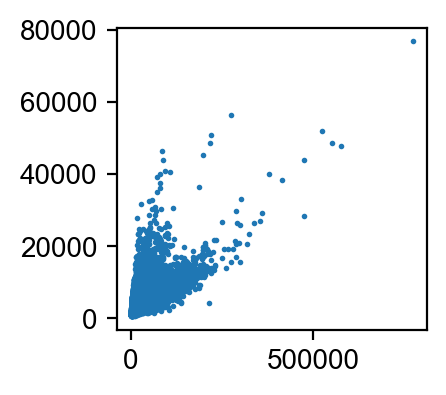

In [19]:
(fig,ax) = plt.subplots(1,1, figsize=(2,2), dpi=200)
ax.scatter(res_filt[['Exonic', 'Intronic', 'Intergenic']].sum(axis=1), meta_filt['nUMI'], s=1)

In [20]:
res_filt.head()

1,Exonic,Intronic,Intergenic
BRI-399_AAACGAATCTGCATGA,7950.0,566.0,4242.0
BRI-399_AAACGCTTCCTTGACC,2777.0,232.0,2274.0
BRI-399_AAAGGGCAGCCGGAAT,5257.0,238.0,2095.0
BRI-399_AAAGGGCCACTATGTG,4303.0,315.0,3000.0
BRI-399_AAAGGTAGTGCAGGAT,4671.0,388.0,2210.0


Text(0.5, 0, 'Proportion intergenic reads')

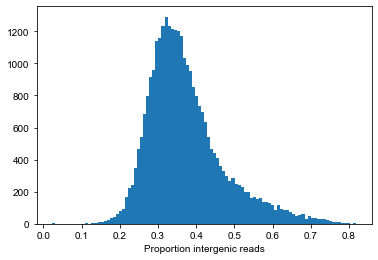

In [21]:
intergenic_proportion = res_filt['Intergenic'] / (res_filt['Intergenic'] + res_filt['Exonic'])
intergenic_proportion_full = (res_filt['Intergenic'] + res_filt['Intronic']) / (res_filt['Intergenic'] + res_filt['Exonic'] + res_filt['Intronic'])
intergenic_proportion_full2 = res_filt['Intergenic'] / (res_filt['Intergenic'] + res_filt['Exonic'] + res_filt['Intronic'])


_ = plt.hist(intergenic_proportion, bins=100)
plt.xlabel('Proportion intergenic reads')

In [22]:
cgepnames = read_dataset_log('cGEP_Name')
renmap = dict(zip(cgepnames['cGep_Name'], cgepnames['Short_Name']))

tcat_usage = pd.read_csv(dataset_paths.loc['AMP-RA', 'tcat_fn'], sep='\t', index_col=0)
tcat_usage = tcat_usage.rename(columns=renmap)
tcat_usage_norm = tcat_usage.div(tcat_usage.sum(axis=1), axis=0)


In [23]:
overlap = list(set(tcat_usage_norm.index).intersection(intergenic_proportion.index))

In [24]:
tcat_usage_norm = tcat_usage_norm.loc[overlap, :]
intergenic_proportion = intergenic_proportion.loc[overlap]

In [25]:
R = tcat_usage_norm.loc[intergenic_proportion.index, :].corrwith(intergenic_proportion).sort_values(ascending=False)
R.head()

Poor-Quality           0.745492
Mito                   0.322382
Doublet-Plasmablast    0.175877
Doublet-Myeloid        0.163031
Tfh-1                  0.083501
dtype: float64

In [26]:
R2 = tcat_usage_norm.loc[intergenic_proportion_full.index, :].corrwith(intergenic_proportion_full).sort_values(ascending=False)
R2.head()

Poor-Quality           0.742074
Mito                   0.318836
Doublet-Plasmablast    0.175772
Doublet-Myeloid        0.163758
Treg                   0.078871
dtype: float64

In [27]:
R3 = tcat_usage_norm.loc[intergenic_proportion_full2.index, :].corrwith(intergenic_proportion_full2).sort_values(ascending=False)
R3.head()

Poor-Quality           0.740884
Mito                   0.322412
Doublet-Plasmablast    0.176085
Doublet-Myeloid        0.162213
Tph                    0.089290
dtype: float64

In [29]:
from scipy.stats import pearsonr
rval, pval = pearsonr(tcat_usage_norm.loc[intergenic_proportion_full2.index, 'Poor-Quality'], intergenic_proportion_full2)

In [30]:
print('%.2e' % pval)

0.00e+00


Text(0.1, 0.75, 'R=0.74')

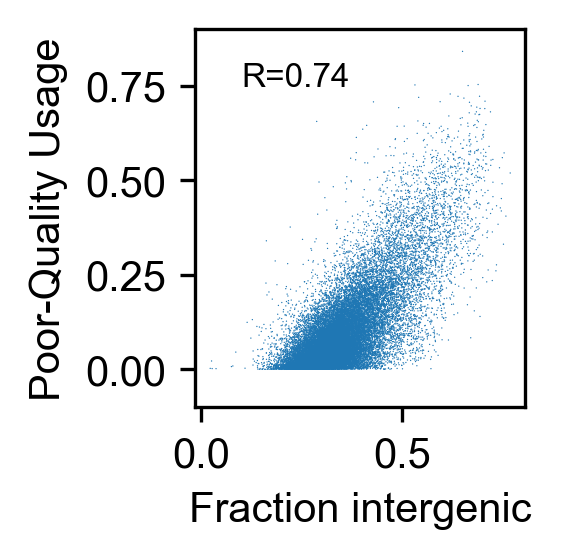

In [33]:
(fig,ax) = plt.subplots(1,1, figsize=(2,2), dpi=300, gridspec_kw={'left':0.35, 'bottom':0.25})

ax.scatter(intergenic_proportion_full2, tcat_usage_norm.loc[intergenic_proportion_full2.index, 'Poor-Quality'],
           s=.1, edgecolor='None')

#dsshow(pd.DataFrame({'x':intergenic_proportion_full2,
#                     'y':tcat_usage_norm.loc[intergenic_proportion_full2.index, 'MALAT1']}), 
#                       ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto',            
#      )

ax.set_xlabel('Fraction intergenic', fontsize=10)
ax.set_ylabel('Poor-Quality Usage', fontsize=10)
ax.set_ylim([-.1,.9])
ax.text(0.1, .75, 'R=%.2f' % R3.at['Poor-Quality'], fontsize=8)

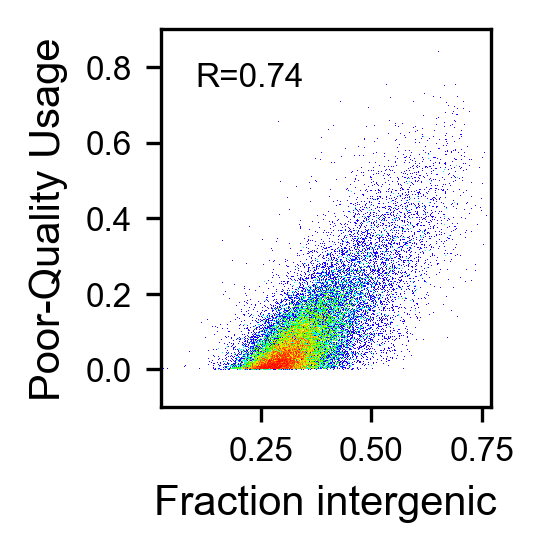

In [35]:
(fig,ax) = plt.subplots(1,1, figsize=(2,2), dpi=300, gridspec_kw={'left':0.35, 'bottom':0.25})

#ax.scatter(intergenic_proportion_full2, tcat_usage_norm.loc[intergenic_proportion_full2.index, 'MALAT1'],
#           s=.5, edgecolor='None')

dsshow(pd.DataFrame({'x':intergenic_proportion_full2,
                     'y':tcat_usage_norm.loc[intergenic_proportion_full2.index, 'Poor-Quality']}), 
                       ds.Point('x', 'y'), norm='eq_hist', cmap=cmap, ax = ax, aspect = 'auto',      
      
      )

ax.set_xlabel('Fraction intergenic', fontsize=10)
ax.set_ylabel('Poor-Quality Usage', fontsize=10)
ax.set_ylim([-.1,.9])
ax.text(0.1, .75, 'R=%.2f' % R3.at['Poor-Quality'], fontsize=8)
ax.tick_params(labelsize=8)

plt.savefig('../../../Figures/Components/MALAT1_IntergenicFraction_AMPRA.png', dpi=300)
plt.savefig('../../../Figures/Components/MALAT1_IntergenicFraction_AMPRA.pdf', dpi=300)